# Imports for Zgoubidoo and Python environment
Typical imports for an interactive notebook. The `autoreload` extension is activated for easy development in an external editor.

The not-so-special variable `_` is the unit registry for easy access to units (e.g. `_.cm`).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zgoubidoo
from zgoubidoo.commands import *
_ = zgoubidoo.ureg

# Creation of FODO cells

`Objet5` is required for the Twiss computation. The _drifts_ are replaced with `Bend` with vanishing B-field so that the tracks for these elements are also provided (this allows to obtain nice Twiss plots).

In [2]:
di = zgoubidoo.Input('FODO')
di += Objet5('BUNCH', BORO=2149 * _.kilogauss * _.cm, PY = .1, PT = .1, PZ = 1, PP = 1, PX = .1, PD =0.01)
di += Proton()
q1 = Quadrupole('QUAD1',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q2 = Quadrupole('QUAD2',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q3 = Quadrupole('QUAD3',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q4 = Quadrupole('QUAD4',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=1*_.mm,
) 
q5 = Quadrupole('QUAD5',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q6 = Quadrupole('QUAD6',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q7 = Quadrupole('QUAD7',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=1*_.mm,
) 
q8 = Quadrupole('QUAD8',
    XL=10 * _.cm,
    B0=-.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q9 = Quadrupole('QUAD9',
    XL=5 * _.cm,
    B0=.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 

di += q1
di += FakeDrift('D1', XL= 150 * _.mm)
di += q2
di += FakeDrift('D2', XL= 150 * _.mm)
di += q3
di += Matrix()
di += q4
di += FakeDrift('D3', XL= 150 * _.mm)
di += q5
di += FakeDrift('D4', XL= 150 * _.mm)
di += q6
di += Matrix()
di += q7
di += FakeDrift('D5', XL= 150 * _.mm)
di += q8
di += FakeDrift('D6', XL= 150 * _.mm)
di += q9
di += Dipole('B1', AT=1.5 * _.degree, RM = 10 * _.m)
di += Matrix()
di.XPAS = 1 * _.mm
di.XE = 0 * _.mm
di.XS = 0 * _.mm
z = zgoubidoo.Zgoubi()
out = z(di).collect()
out.print()

FODO
 
 
 'OBJET' BUNCH                                                                                                1
2.149000000000e+03
5.01
1.000000000000e-01 1.000000000000e-01 1.000000000000e+00 1.000000000000e+00 1.000000000000e-01 1.000000000000e-02
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
 
 'PARTICUL' PROTON                                                                                            2
9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
 
 
 'QUADRUPO' QUAD1                                                                                             3
2
5.000000000000e+00 1.000000000000e+00 8.000000000000e+00
0.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.0000000

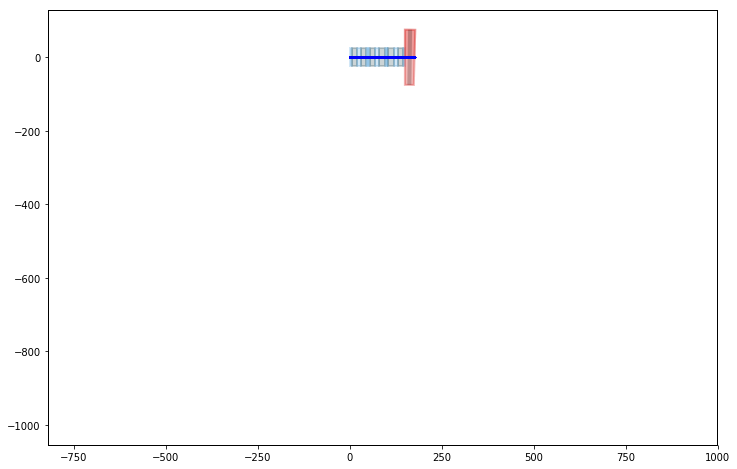

In [3]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

zmpl = zgoubidoo.vis.ZgoubiMpl(ax, with_frames=False, with_boxes=True, with_drifts=True, with_centers=False)
line = zgoubidoo.survey(beamline=di)
zgoubidoo.vis.beamline(line=line, 
                        artist=zmpl, 
                        tracks=out.tracks, 
                        )
ax.set_aspect('equal', 'datalim')

# Twiss computation from Zgoubi

First we read the periodic values of the Twiss parameters, as computed by `Zgoubi`. `Matrix` is repeated at the end of each cell of the previous `Input`, we correctly observe that the periodicity is still present (all three lines of the `DataFrame` are equal).

In [4]:
twiss_init = zgoubidoo.read_matrix_file(path=out.paths[list(out.paths.keys())[0]].name)
twiss_init[['BETA11', 'ALPHA11', 'GAMMA11', 'BETA22', 'ALPHA22', 'GAMMA22', 'R11']]

,BETA11,ALPHA11,GAMMA11,BETA22,ALPHA22,GAMMA22,R11
0,0.931184,-6.891915e-07,1.073901,0.422212,-0.000196,2.368477,0.682754
1,0.931185,-1.274330e-06,1.073901,0.422270,-0.000280,2.368155,-0.067693
2,0.765227,-1.764270e-01,1.347477,0.267312,-0.821044,6.262765,-0.952839


# Step-by-step Twiss computation with Zgoubidoo

In [7]:
np.radians(1.5) * 10

0.26179938779914946

In [20]:
matrix = zgoubidoo.twiss.compute_transfer_matrix(di, out.tracks, align_on='X')
twiss = zgoubidoo.twiss.compute_twiss(matrix, twiss_init.iloc[-1])
twiss.head(5)

,index,R11,R21,R31,R41,R51,R12,R22,R32,R42,...,GAMMA11,GAMMA22,MU1,MU2,DET1,DET2,DISP1,DISP2,DISP3,DISP4
0,0,1.000000,0.000000,0.0,0.0,0.0,0.000,1.000000,0.0,0.0,...,1.347477,6.262765,0.000000,0.000000,1.0,1.0,-5.918810e-12,-1.510445e-11,0.0,0.0
1,1,0.999981,-0.037226,0.0,0.0,0.0,0.001,0.999981,0.0,0.0,...,1.335352,6.324500,0.001307,0.003729,1.0,1.0,-5.933804e-12,-1.488384e-11,0.0,0.0
2,2,0.999926,-0.074451,0.0,0.0,0.0,0.002,0.999926,0.0,0.0,...,1.325250,6.387451,0.002613,0.007436,1.0,1.0,-5.948577e-12,-1.466266e-11,0.0,0.0
3,3,0.999832,-0.111674,0.0,0.0,0.0,0.003,0.999832,0.0,0.0,...,1.317171,6.451628,0.003918,0.011119,1.0,1.0,-5.963129e-12,-1.444095e-11,0.0,0.0
4,4,0.999702,-0.148892,0.0,0.0,0.0,0.004,0.999702,0.0,0.0,...,1.311117,6.517040,0.005223,0.014778,1.0,1.0,-5.977459e-12,-1.421869e-11,0.0,0.0


# Twiss plots

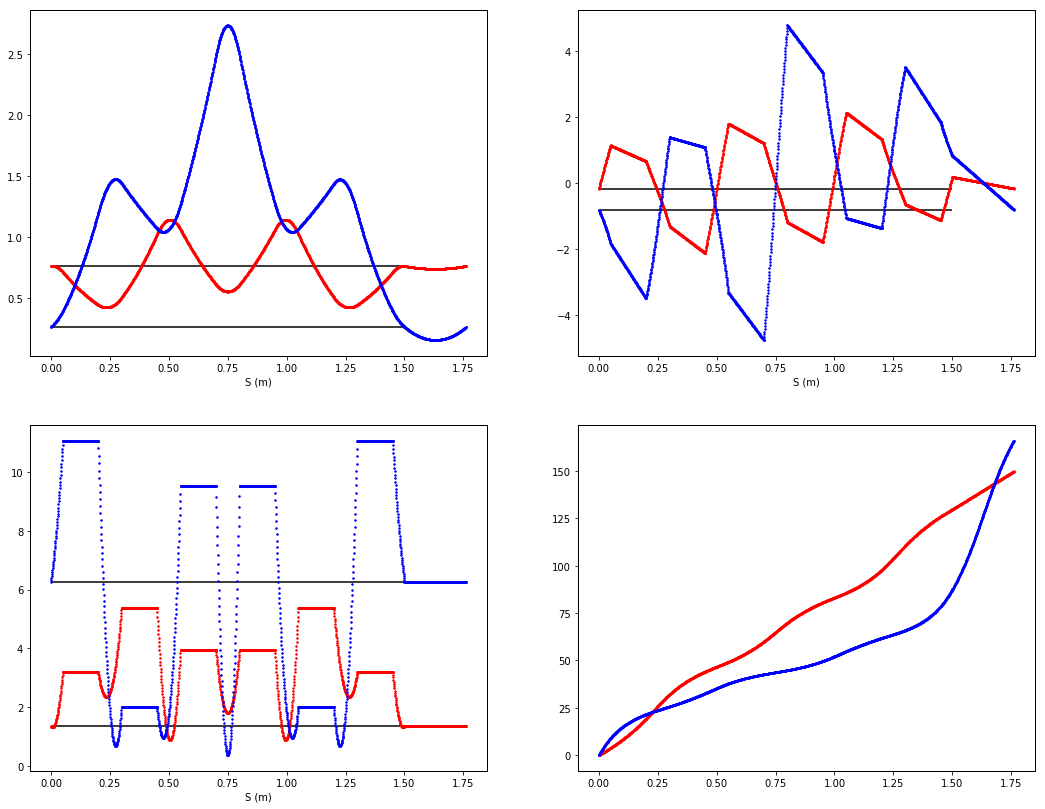

In [21]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(221)
ax.plot(twiss['S'], twiss['BETA11'], 'r.')
ax.plot(twiss['S'], twiss['BETA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['BETA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['BETA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(222)
ax.plot(twiss['S'], twiss['ALPHA11'], 'r.')
ax.plot(twiss['S'], twiss['ALPHA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['ALPHA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['ALPHA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(223)
ax.plot(twiss['S'], twiss['GAMMA11'], 'r.')
ax.plot(twiss['S'], twiss['GAMMA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['GAMMA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['GAMMA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(224)
ax.plot(twiss['S'], np.degrees(twiss['MU1']), 'r.')
ax.plot(twiss['S'], np.degrees(twiss['MU2']), 'b.')

plt.show()

# Dispersion

In [170]:
di = zgoubidoo.Input('FODO')
#di += Objet5('BUNCH', BORO=2149 * _.kilogauss * _.cm, PY = 1, PT = 1, PZ = .1, PP = 1, PX = .1, PD =0.1)
di += Objet5('BUNCH', BORO=2149 * _.kilogauss * _.cm, PY = 1, PT = 1, PZ = .1, PP = 1, PX = .1, PD =0.1,
              YR=0 , TR=-2.397009792, ZR= 0.0, PR = 0.0)

     
#di += Objet2('BUNCH', BORO=2149 * _.kilogauss * _.cm).add([[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]])    

di += Proton()
q1 = Quadrupole('QUAD1',
    XL=5 * _.cm,
    B0=0.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q2 = Quadrupole('QUAD2',
    XL=10 * _.cm,
    B0=-1.0 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 
q3 = Quadrupole('QUAD3',
    XL=5 * _.cm,
    B0=0.8 * _.tesla,
    XPAS=1 * _.millimeter,
    XE=0 * _.cm,
    LAM_E=0 * _.mm,
    XS=0 * _.cm,
    LAM_S=0*_.mm,
) 

di += q1
di += Bend('D1',
    XL= 100 * _.mm,
    B1= -1000.0 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=0,
)
di += q2
di += Bend('D2',
    XL= 100 * _.mm,
    B1= 1000.0 * _.gauss,
    SK= 0 * _.degree,
    LAM_E= 0 * _.mm,
    LAM_S= 0 * _.mm,
    KPOS=0,
)
di += q3
di += Matrix()
fit = Fit2(
    PENALTY=1e-12,
    PARAMS = [
        {
            'IR': 1,
            'IP': 30,
            'XC': 0,
            'DV': [-10, 10],
        },
        {
            'IR': 1,
            'IP': 31,
            'XC': 0,
            'DV': 4.0,
        },
        {
            'IR': 1,
            'IP': 32,
            'XC': 0,
            'DV': 4.0,
        },
        {
            'IR': 1,
            'IP': 33,
            'XC': 0,
            'DV': 4.0,
        },
    ],
    CONSTRAINTS = [
        {
            'IC': 3.1,
            'I': 1,
            'J': 2,
            'IR': 7,
            'V': 0.0,
            'WV': 1.0,
            'NP': 0,
        },
        {
            'IC': 3.1,
            'I': 1,
            'J': 3,
            'IR': 7,
            'V': 0.0,
            'WV': 1.0,
            'NP': 0,
        },
        {
            'IC': 3.1,
            'I': 1,
            'J': 4,
            'IR': 7,
            'V': 0.0,
            'WV': 1.0,
            'NP': 0,
        },
        {
            'IC': 3.1,
            'I': 1,
            'J': 5,
            'IR': 7,
            'V': 0.0,
            'WV': 1.0,
            'NP': 0,
        }
    ]
)
#di += fit
di.XPAS = 1 * _.mm

z = zgoubidoo.Zgoubi()
out = z(di)
print('\n'.join(out.results[0]['result']))

FODO
 
 
 'OBJET' BUNCH                                                                                                1
2.149000000000e+03
5.01
1.000000000000e+00 1.000000000000e+00 1.000000000000e-01 1.000000000000e+00 1.000000000000e-01 1.000000000000e-01
0.000000000000e+00 -2.397009792000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
 
 'PARTICUL' PROTON                                                                                            2
9.382720300000e+02 1.602176487000e-19 1.792847350500e+00 0.000000000000e+00 0.0
 
 
 'QUADRUPO' QUAD1                                                                                             3
2
5.000000000000e+00 1.000000000000e+00 8.000000000000e+00
0.000000000000e+00 0.000000000000e+00
6 0.000000000000e+00 1.000000

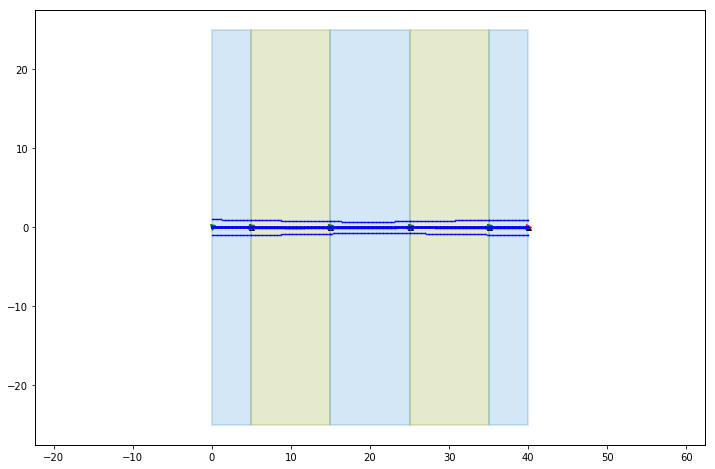

In [171]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

zmpl = zgoubidoo.vis.ZgoubiMpl(ax, with_frames=True, with_boxes=True, with_drifts=True)
tracks = zgoubidoo.read_plt_file()
line = zgoubidoo.survey(beamline=di, reference_frame=Frame())
zgoubidoo.vis.plot(beamline=line, 
                        artist=zmpl, 
                        tracks=tracks, 
                        )
ax.set_aspect('equal', 'datalim')

In [172]:
twiss_init = zgoubidoo.read_matrix_file()
twiss_init[['BETA11', 'ALPHA11', 'GAMMA11', 'BETA22', 'ALPHA22', 'GAMMA22', 'R11', 'DY', 'DYP', 'DZ', 'DZP']]

,BETA11,ALPHA11,GAMMA11,BETA22,ALPHA22,GAMMA22,R11,DY,DYP,DZ,DZP
0,1.830798,-0.000085,0.54621,0.30937,-0.000002,3.232374,0.954505,0.00012,0.00252,0.0,0.0


In [173]:
tracks = zgoubidoo.read_plt_file()
matrix = zgoubidoo.twiss.compute_transfer_matrix(di, tracks, align_on='X')
twiss = zgoubidoo.twiss.compute_twiss(matrix, twiss_init.iloc[-1])
twiss.head(5)

,index,R11,R21,R31,R41,R51,R12,R22,R32,R42,...,GAMMA11,GAMMA22,MU1,MU2,DET1,DET2,DISP1,DISP2,DISP3,DISP4
0,0,1.000000,0.000000,0.0,0.0,0.0,0.000,1.000000,0.0,0.0,...,0.546210,3.232374,1.000000,1.000000,1.0,1.0,0.000120,0.002520,0.0,0.0
1,1,0.999981,-0.037226,0.0,0.0,0.0,0.001,0.999981,0.0,0.0,...,0.548720,3.232924,1.000000,0.999995,1.0,1.0,0.000122,0.002516,0.0,0.0
2,2,0.999926,-0.074451,0.0,0.0,0.0,0.002,0.999926,0.0,0.0,...,0.556264,3.234571,0.999999,0.999979,1.0,1.0,0.000125,0.002511,0.0,0.0
3,3,0.999832,-0.111674,0.0,0.0,0.0,0.003,0.999832,0.0,0.0,...,0.568840,3.237317,0.999999,0.999953,1.0,1.0,0.000127,0.002506,0.0,0.0
4,4,0.999702,-0.148892,0.0,0.0,0.0,0.004,0.999702,0.0,0.0,...,0.586446,3.241162,0.999998,0.999916,1.0,1.0,0.000130,0.002501,0.0,0.0


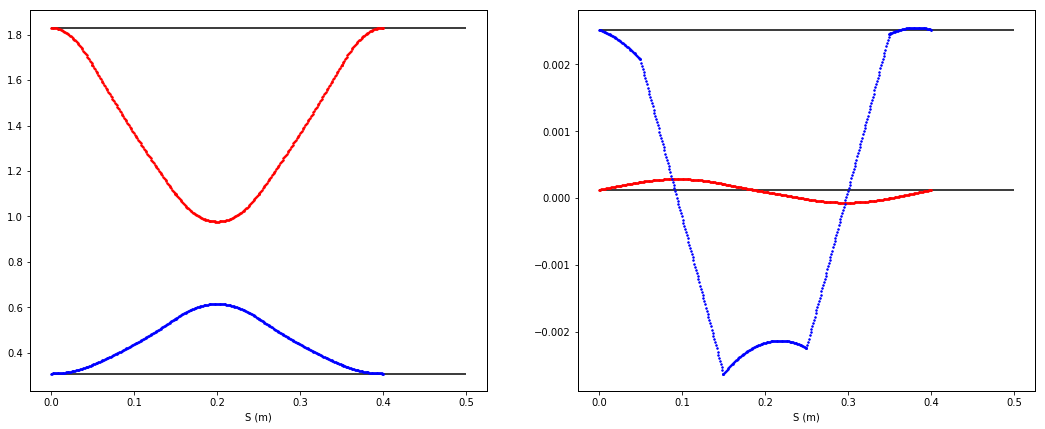

In [174]:
fig = plt.figure(figsize=(18, 7))
ax = fig.add_subplot(121)
ax.plot(twiss['S'], twiss['BETA11'], 'r.')
ax.plot(twiss['S'], twiss['BETA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['BETA11']], xmin=0, xmax=0.5)
ax.hlines([twiss_init.iloc[-1]['BETA22']], xmin=0, xmax=0.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(122)
ax.plot(twiss['S'], twiss['DISP1'], 'r.')
ax.plot(twiss['S'], twiss['DISP2'], 'b.')
ax.hlines([twiss_init.iloc[-1]['DY']], xmin=0, xmax=0.5)
ax.hlines([twiss_init.iloc[-1]['DYP']], xmin=0, xmax=0.5)
ax.set_xlabel('S (m)')

plt.show()

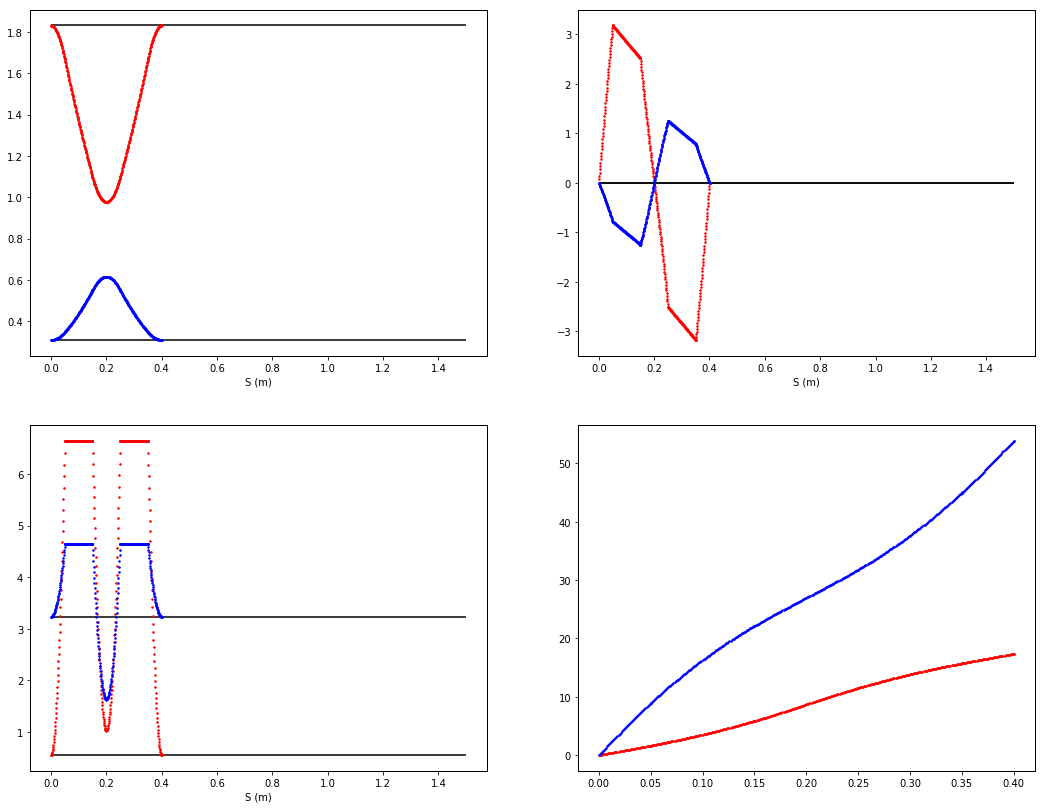

In [175]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(221)
ax.plot(twiss['S'], twiss['BETA11'], 'r.')
ax.plot(twiss['S'], twiss['BETA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['BETA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['BETA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(222)
ax.plot(twiss['S'], twiss['ALPHA11'], 'r.')
ax.plot(twiss['S'], twiss['ALPHA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['ALPHA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['ALPHA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(223)
ax.plot(twiss['S'], twiss['GAMMA11'], 'r.')
ax.plot(twiss['S'], twiss['GAMMA22'], 'b.')
ax.hlines([twiss_init.iloc[-1]['GAMMA11']], xmin=0, xmax=1.5)
ax.hlines([twiss_init.iloc[-1]['GAMMA22']], xmin=0, xmax=1.5)
ax.set_xlabel('S (m)')

ax = fig.add_subplot(224)
ax.plot(twiss['S'], np.degrees(np.arccos(twiss['MU1'])), 'r.')
ax.plot(twiss['S'], np.degrees(np.arccos(twiss['MU2'])), 'b.')

plt.show()

In [3]:
fodo = zgoubidoo.loaders.from_madx_twiss(
    filename='twiss.outx', 
    path='/Users/chernals/Downloads', 
    options={'DRIFT': {'command': FakeDrift}}
)
zi = zgoubidoo.Input(line=[
    Objet5(BORO=fodo.kinematics.brho),
    fodo.particle,
] + fodo.sequence)
zi.XPAS = 2 * _.cm

In [35]:
zi

beamline
        
        
        'OBJET' 19224eade0
        -1.000692202025e+04
        5.01
        1.000000000000e-04 1.000000000000e-04 1.000000000000e-04 1.000000000000e-04 1.000000000000e-04 1.000000000000e-04
        0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00
            0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
            0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00

        'PARTICUL' ELECTRON
        5.109989461000e-01 -1.602176620800e-19 -2.001159652181e+00 0.000000000000e+00 0.0
        
        
        'QUADRUPO' QF_0b82f59
        2
        5.000000000000e+01 1.000000000000e+00 -2.001384404051e-01
        2.000000000000e+00 0.000000000000e+00
        6 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00
        2.000000000000e+00 0.00000

In [4]:
zr = fodo.zgoubi(zi).collect()
zgoubidoo.survey(beamline=zi)
M = zgoubidoo.twiss.compute_transfer_matrix(beamline=zi, tracks=zr.tracks, align_on='X')
twiss = zgoubidoo.twiss.compute_twiss(matrix=M)

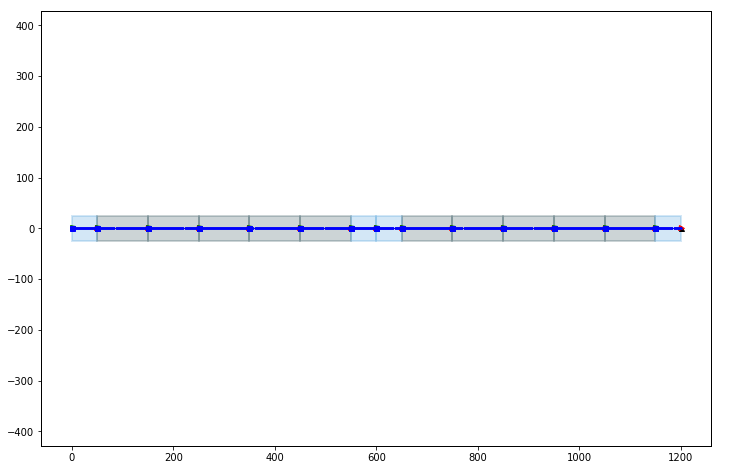

In [5]:
artist = zgoubidoo.vis.ZgoubiMpl(with_frames=True, with_centers=True)
fig = zi.plot(artist=artist, tracks=zr.tracks)

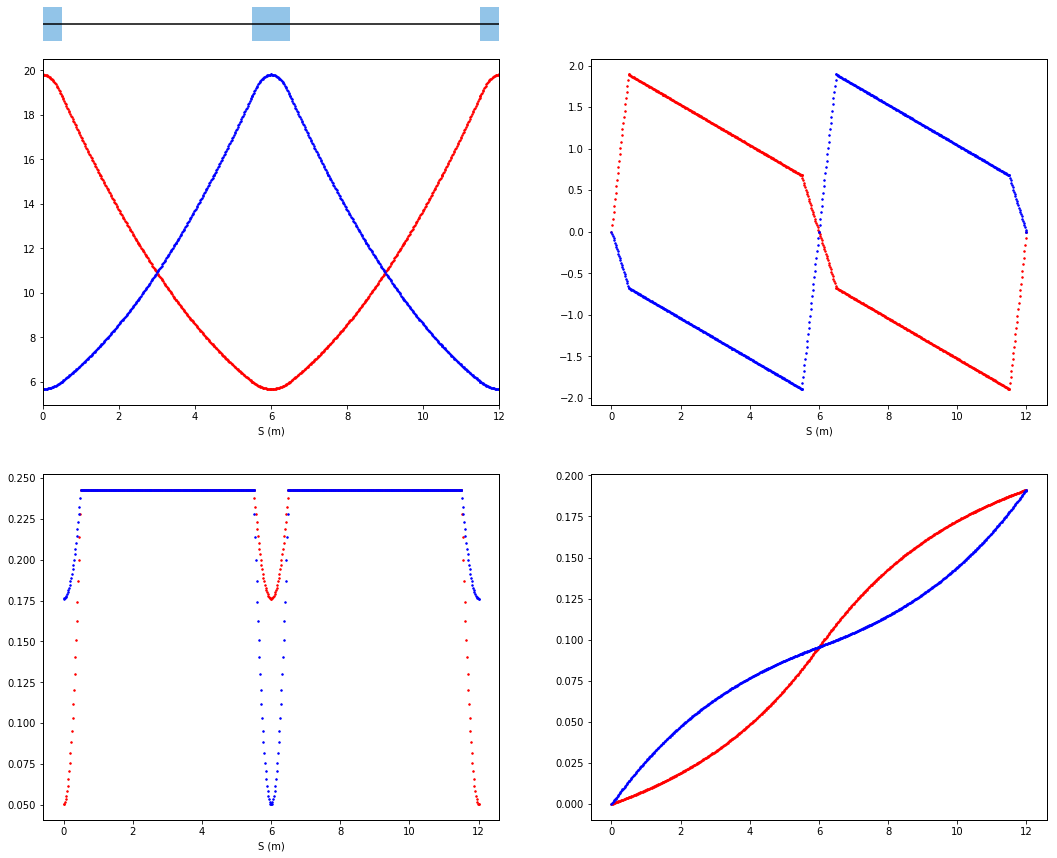

In [6]:
fig = plt.figure(figsize=(18, 14))
ax = fig.add_subplot(221)
artist = zgoubidoo.vis.ZgoubiMpl(ax=ax)
zgoubidoo.vis.cartouche(line=zi, artist=artist)

ax.set_xlim(0, 12)
ax.plot(twiss['S'], twiss['BETA11'], 'r.')
ax.plot(twiss['S'], twiss['BETA22'], 'b.')
ax.set_xlabel('S (m)')

ax = fig.add_subplot(222)
ax.plot(twiss['S'], twiss['ALPHA11'], 'r.')
ax.plot(twiss['S'], twiss['ALPHA22'], 'b.')
ax.set_xlabel('S (m)')

ax = fig.add_subplot(223)
ax.plot(twiss['S'], twiss['GAMMA11'], 'r.')
ax.plot(twiss['S'], twiss['GAMMA22'], 'b.')
ax.set_xlabel('S (m)')

ax = fig.add_subplot(224)
ax.plot(twiss['S'], twiss['MU1'] / (2*np.pi), 'r.')
ax.plot(twiss['S'], twiss['MU2'] / (2*np.pi), 'b.')

plt.show()